## NLTK

In [ ]:
!pip install nltk
!pip install spacy
!pip install transformers

In [2]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

# Sample text
text = "Natural Language Processing is transforming AI applications."

# Tokenize the text
tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Shahram\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


['Natural', 'Language', 'Processing', 'is', 'transforming', 'AI', 'applications', '.']


In [3]:
nltk.download('averaged_perceptron_tagger_eng')
# Apply POS tagging
tagged_tokens = nltk.pos_tag(tokens)
print(tagged_tokens)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Shahram\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


[('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('is', 'VBZ'), ('transforming', 'VBG'), ('AI', 'NNP'), ('applications', 'NNS'), ('.', '.')]


In [9]:
import spacy

# Load the pretrained model for NER
nlp = spacy.load("en_core_web_sm")

# Process the text with NER
doc = nlp("Serena Williams won Wimbledon in 2016, solidifying her status as one of the greatest tennis players in history.")

# Extract entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Serena Williams PERSON
Wimbledon EVENT
2016 DATE


In [ ]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

# Analyze the sentiment of the troubleshooting query
result = sentiment_analyzer(text)
print(result)

## Practice activity: Implementing classification models

In [ ]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib seaborn

In [95]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load Breast Cancer dataset and convert to DataFrame
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Explore the dataset
print(df.head())
print(df.info())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [68]:
from sklearn.model_selection import train_test_split

# Handle missing data (example: filling missing values with the median)
df.fillna(df.median(), inplace=True)

# Split the data into features and labels
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Logistic Regression - Accuracy: {precision:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")

Logistic Regression - Accuracy: 0.930, Precision: 0.930, Recall: 0.930, F1 Score: 0.930


C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Decision Tree - Accuracy: {precision:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")

Decision Tree - Accuracy: 0.940, Precision: 0.940, Recall: 0.937, F1 Score: 0.937


In [71]:
from sklearn.svm import SVC

# Train SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"SVM - Accuracy: {precision:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")

SVM - Accuracy: 0.931, Precision: 0.931, Recall: 0.930, F1 Score: 0.930


In [73]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=50, n_estimators=50)
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Random Forest Classifier - Accuracy: {precision:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")

Random Forest Classifier - Accuracy: 0.948, Precision: 0.948, Recall: 0.944, F1 Score: 0.944


In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Random Forest Classifier - Accuracy: {precision:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")

Random Forest Classifier - Accuracy: 0.937, Precision: 0.937, Recall: 0.937, F1 Score: 0.937


In [106]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, X, y, cv=5, scoring='accuracy')

array([0.92982456, 0.93859649, 0.98245614, 0.96491228, 0.97345133])

## Data validation

In [124]:
df_with_missing = df.copy()
df_with_missing.iloc[-1, 0] = None

In [125]:
df_with_missing.isnull().values.any()

np.True_

## Practice activity: Implementing the troubleshooting agent

In [158]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 1000
data = {
    'timestamp': pd.date_range(start='2024-01-01', periods=n_samples, freq='h'),
    'cpu_usage': np.random.normal(50, 10, n_samples),       # CPU usage in percentage
    'memory_usage': np.random.normal(60, 15, n_samples),    # Memory usage in percentage
    'network_latency': np.random.normal(100, 20, n_samples), # Network latency in ms
    'disk_io': np.random.normal(75, 10, n_samples),         # Disk I/O in MB/s
    'error_rate': np.random.choice([0, 1], n_samples, p=[0.95, 0.05])  # 5% error rate
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())
print(df.info())

            timestamp  cpu_usage  memory_usage  network_latency    disk_io  \
0 2024-01-01 00:00:00  54.967142     80.990332        86.496435  55.921924   
1 2024-01-01 01:00:00  48.617357     73.869505        97.109627  66.396150   
2 2024-01-01 02:00:00  56.476885     60.894456        84.151602  70.863945   
3 2024-01-01 03:00:00  65.230299     50.295948        93.840769  93.876877   
4 2024-01-01 04:00:00  47.658466     70.473350        62.127707  80.565531   

   error_rate  
0           0  
1           0  
2           1  
3           0  
4           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        1000 non-null   datetime64[ns]
 1   cpu_usage        1000 non-null   float64       
 2   memory_usage     1000 non-null   float64       
 3   network_latency  1000 non-null   float64       
 4   disk_io

In [159]:
from sklearn.ensemble import IsolationForest

# Implement anomaly detection using Isolation Forest
def detect_anomalies(data):
    model = IsolationForest(contamination=0.02, random_state=42)
    model.fit(data)
    anomalies = model.predict(data)
    return anomalies

# Detect anomalies in the dataset 
numeric_data = df.select_dtypes(include=[float, int]).drop(["error_rate"], axis=1) # Only numeric columns 
df['anomaly'] = detect_anomalies(numeric_data)

print(df['anomaly'].value_counts()) # -1 denotes an anomaly

anomaly
 1    980
-1     20
Name: count, dtype: int64


In [160]:
numeric_data.mean()

cpu_usage           50.193321
memory_usage        61.062544
network_latency    100.116684
disk_io             74.812808
dtype: float64

In [161]:
df[df['anomaly']==-1]

,timestamp,cpu_usage,memory_usage,network_latency,disk_io,error_rate,anomaly
17,2024-01-01 17:00:00,53.142473,52.741712,59.922753,46.678444,0,-1
24,2024-01-02 00:00:00,44.556173,85.913148,39.609757,56.302583,0,-1
66,2024-01-03 18:00:00,49.279899,40.579778,51.223657,92.549331,0,-1
83,2024-01-04 11:00:00,44.817298,91.151220,54.076381,63.828135,0,-1
209,2024-01-09 17:00:00,88.527315,86.243651,99.985828,79.512253,0,-1
262,2024-01-11 22:00:00,17.587327,68.081340,124.715644,65.953856,1,-1
291,2024-01-13 03:00:00,45.069991,97.394993,119.577161,50.121913,0,-1
305,2024-01-13 17:00:00,51.173274,46.522980,162.198371,85.613710,0,-1
374,2024-01-16 14:00:00,71.531825,82.067555,122.347976,58.173413,0,-1
471,2024-01-20 15:00:00,26.980788,50.853256,147.277450,74.191215,0,-1


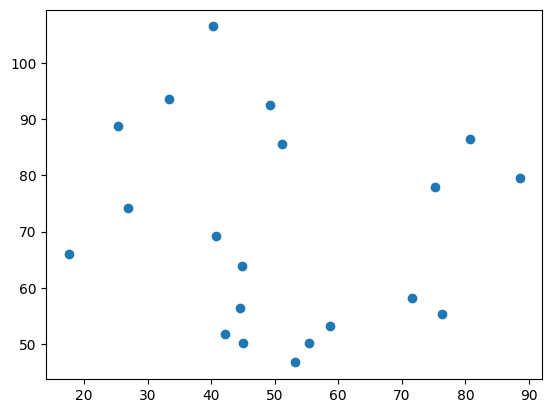

In [162]:
from matplotlib import pyplot as plt

plt.scatter(df[df["anomaly"]==-1]["cpu_usage"], df[df["anomaly"]==-1]["disk_io"])

In [164]:
from scipy.stats import zscore

# Calculate z-scores to identify anomalous values per column in anomalous rows
z_scores = numeric_data.apply(zscore)

# Function to identify anomalous columns for each row
def find_anomalous_columns(row, threshold=2):
    return [col for col in numeric_data.columns if abs(z_scores.loc[row.name, col]) > threshold]

# Apply the function to each anomalous row
df['anomalous_columns'] = df.apply(lambda row: find_anomalous_columns(row) if row['anomaly'] == -1 else [], axis=1)

# Display rows with anomalies and their anomalous columns
print(df[df['anomaly'] == -1][['timestamp', 'anomaly', 'anomalous_columns']])

              timestamp  anomaly                anomalous_columns
17  2024-01-01 17:00:00       -1       [network_latency, disk_io]
24  2024-01-02 00:00:00       -1                [network_latency]
66  2024-01-03 18:00:00       -1                [network_latency]
83  2024-01-04 11:00:00       -1  [memory_usage, network_latency]
209 2024-01-09 17:00:00       -1                      [cpu_usage]
262 2024-01-11 22:00:00       -1                      [cpu_usage]
291 2024-01-13 03:00:00       -1          [memory_usage, disk_io]
305 2024-01-13 17:00:00       -1                [network_latency]
374 2024-01-16 14:00:00       -1                      [cpu_usage]
471 2024-01-20 15:00:00       -1     [cpu_usage, network_latency]
478 2024-01-20 22:00:00       -1                      [cpu_usage]
521 2024-01-22 17:00:00       -1       [network_latency, disk_io]
531 2024-01-23 03:00:00       -1                               []
544 2024-01-23 16:00:00       -1     [cpu_usage, network_latency]
562 2024-0